<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
# import your code here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Load the health insurance dataset and check the first five observations

In [2]:
# import your code here
data=pd.read_csv('health_insurance.csv')
data.head(5)

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi'>

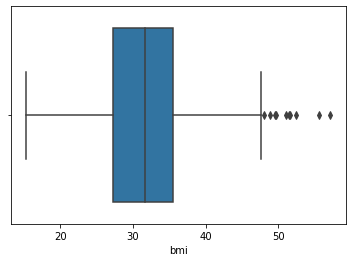

In [3]:
sns.boxplot(data['bmi'])

<AxesSubplot:xlabel='bmi'>

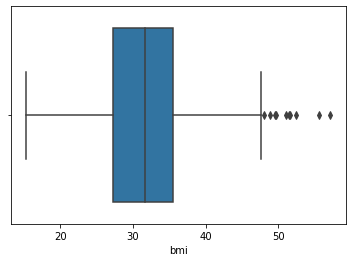

In [4]:
# import your code here
sns.boxplot(data['bmi'])
#yes outlier are there


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.04359793424360781


<AxesSubplot:xlabel='age'>

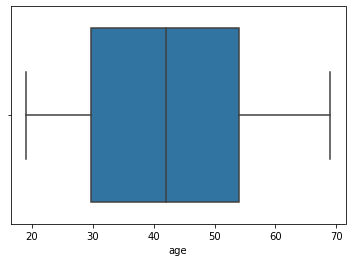

In [5]:
# import your code here
print(data['age'].skew())
sns.boxplot(data['age'])

In [6]:
data.head(1)

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.9,157,0,southwest,smoker,16884.924


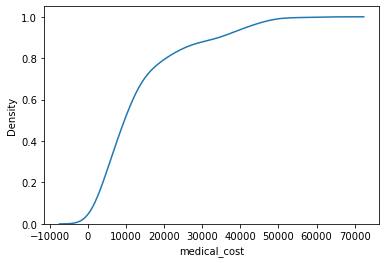

In [12]:
# import your code here
data['medical_cost']<25000
sns.kdeplot(data['medical_cost'],cumulative=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

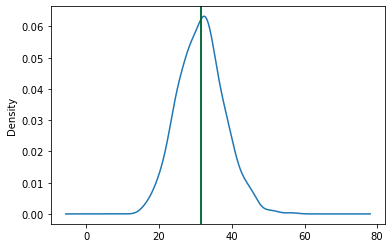

In [13]:
# import your code here

data['bmi'].plot(kind='kde')
plt.axvline(data["bmi"].mean(),color="blue")
plt.axvline(data["bmi"].median(),color="green")

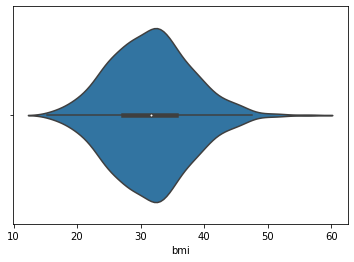

In [15]:
sns.violinplot(data['bmi'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

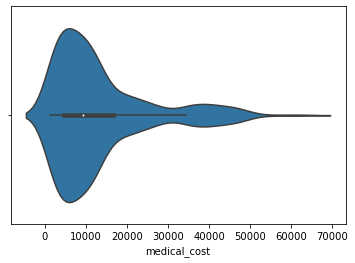

In [14]:
# import your code here
sns.violinplot(data['medical_cost'])
plt.show()

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# import your code here
data[(data['age']<30)&(data['medical_cost']>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

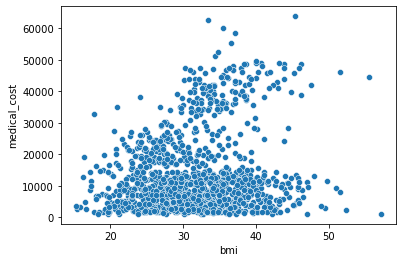

In [20]:
# import your code here
sns.scatterplot(data['bmi'],data['medical_cost'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# import your code here
d1=data.groupby('gender')['bmi'].std()
d2=data.groupby('gender')['bmi'].mean()
print(d1/d2*100)

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# import your code here
d1=data[data["gender"]=="M"]
d2=pd.crosstab(data["region"],d1["gender"])
d2.loc["southeast"]

gender
M    178
Name: southeast, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

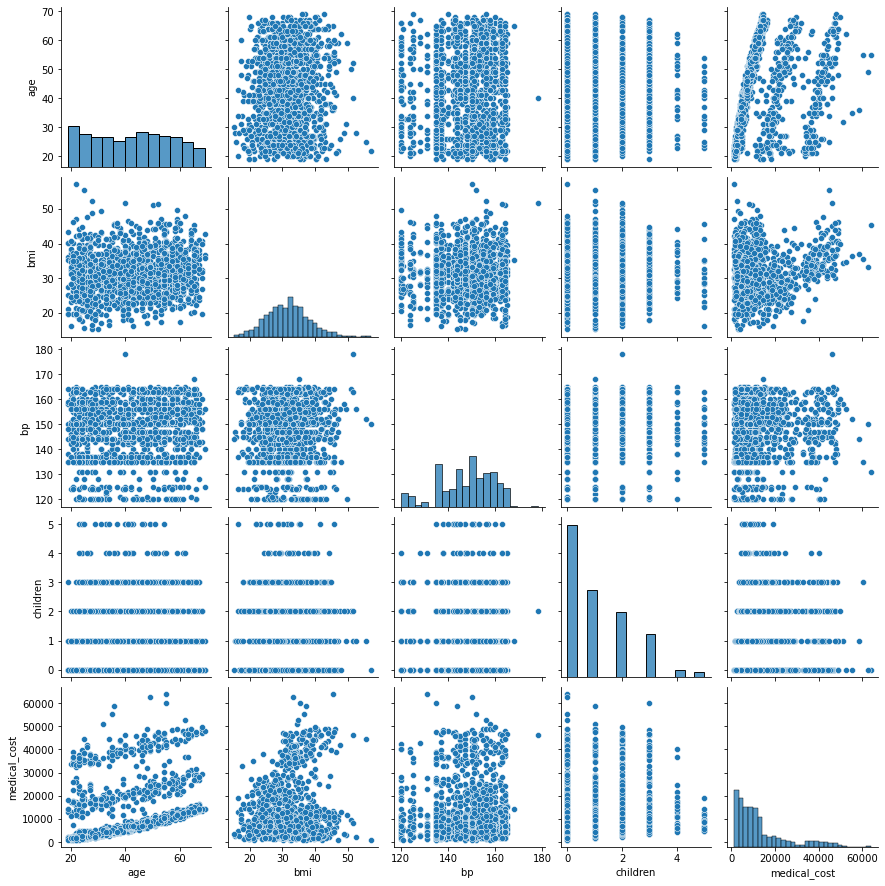

In [24]:
# import your code here
sns.pairplot(data)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

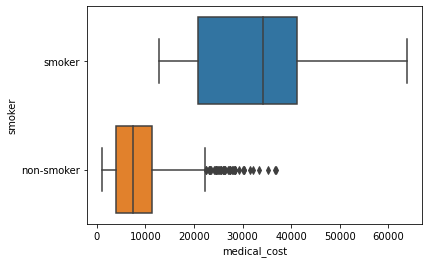

In [25]:
# import your code here
sns.boxplot(data['medical_cost'],data['smoker'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
data.head(1)

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.9,157,0,southwest,smoker,16884.924


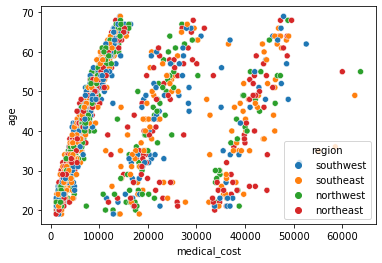

In [28]:
# import your code here
sns.scatterplot(data['medical_cost'],data['age'],hue=data['region'])
plt.show()

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
data['region'].nunique()

In [ ]:
data=pd.get_dummies(data,columns=['region'])
data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# import your code here
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(exclude=np.number)

In [44]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_data['smoker_label']=le.fit_transform(cat_data['smoker'])
cat_data

,gender,region,smoker,smoker_label
0,NaN,southwest,smoker,1
1,NaN,southeast,non-smoker,0
2,NaN,southeast,non-smoker,0
3,NaN,northwest,non-smoker,0
4,NaN,northwest,non-smoker,0
...,...,...,...,...
1295,NaN,southwest,non-smoker,0
1296,NaN,northeast,non-smoker,0
1297,NaN,southeast,non-smoker,0
1298,NaN,northwest,non-smoker,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# import your code here
cat_data['gender'].value_counts()

F    657
M    643
Name: gender, dtype: int64

In [41]:
tab1=cat_data['gender'].value_counts()
tab1

F    657
M    643
Name: gender, dtype: int64

In [43]:
cat_data['gender']=cat_data['gender'].map(tab1)
cat_data.head(2)

,gender,region,smoker,smoker_label
0,NaN,southwest,smoker,1
1,NaN,southeast,non-smoker,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# import your code here
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_data['smoker_label']=le.fit_transform(cat_data['smoker'])
cat_data

,gender,region,smoker,smoker_label
0,M,southwest,smoker,1
1,F,southeast,non-smoker,0
2,F,southeast,non-smoker,0
3,F,northwest,non-smoker,0
4,F,northwest,non-smoker,0
...,...,...,...,...
1295,F,southwest,non-smoker,0
1296,M,northeast,non-smoker,0
1297,M,southeast,non-smoker,0
1298,M,northwest,non-smoker,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
# import your code here
data_num=data.select_dtypes(include=np.number)
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
a=sc.fit_transform(data_num,y="bmi")
print(a)


[[-1.37528701  0.05014192  0.82239756 -0.91424104  0.30207286]
 [-1.58927541  0.8165832   1.08983277 -0.0865855  -0.95536818]
 [-0.66199233  0.53802035 -0.24734328  1.56872557 -0.72942505]
 ...
 [-1.51794594  0.51441333 -0.24734328 -0.91424104 -0.96330787]
 [-1.44661648 -1.06725708  0.19838207 -0.91424104 -0.93194424]
 [ 1.4778917   0.23427668  1.0006877  -0.91424104  1.31872092]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
mm=MinMaxscaler()
pd.DataFrame(mm.fit_transformation(num_data,y='age'),columns=num_data.columns)

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
sns.boxplot(data['medical_cost'])
plt.show()

In [ ]:
sb.boxplot(np.log(data["medical_cost"]))
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [37]:
# import your code here
log1=np.log(data['medical_cost'])
log1

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1295     9.268661
1296     7.698927
1297     7.396233
1298     7.604867
1299    10.279914
Name: medical_cost, Length: 1300, dtype: float64

In [38]:
data['medical_cost']=np.log(data['medical_cost'])
data

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,9.734176
1,20,F,36.770,160,1,southeast,non-smoker,7.453302
2,33,F,35.000,145,3,southeast,non-smoker,8.400538
3,37,F,23.705,153,0,northwest,non-smoker,9.998092
4,36,F,27.880,156,0,northwest,non-smoker,8.260197
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,9.268661
1296,22,M,34.920,156,0,northeast,non-smoker,7.698927
1297,21,M,34.850,145,0,southeast,non-smoker,7.396233
1298,22,M,24.800,150,0,northwest,non-smoker,7.604867
